# Process Weather

Processes hourly weather data from INMET for Belo Horizonte - Pampulha station (2015–2019).

The script performs the following steps:
  - Aggregates the data from https://tempo.inmet.gov.br/TabelaEstacoes/A521 to get daily:
    - Maximum and minimum temperature,
    - Maximum and minimum humidity.
  - Exports the daily summary as a CSV file: 'daily_weather_pampulha_2015_19.csv'.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_2015_1 = pd.read_csv('2015_BELO_HORIZONTE_PAMPULHA_A521_01012015_30062015.csv', sep=';')
df_2015_2 = pd.read_csv('2015_BELO_HORIZONTE_PAMPULHA_A521_ 01072015_31122015.csv', sep=';')

df_2016_1 = pd.read_csv('2016_BELO_HORIZONTE_PAMPULHA_01012016_30062016.csv', sep=';')
df_2016_2 = pd.read_csv('2016_BELO_HORIZONTE_PAMPULHA_01072016_31122016.csv', sep=';')

df_2017_1 = pd.read_csv('2017_BELO_HORIZONTE_PAMPULHA_01012017_30062017.csv', sep=';')
df_2017_2 = pd.read_csv('2017_BELO_HORIZONTE_PAMPULHA_01072017_31122017.csv', sep=';')

df_2018_1 = pd.read_csv('2018_BELO_HORIZONTE_PAMPULHA_01012018_30062018.csv', sep=';')
df_2018_2 = pd.read_csv('2018_BELO_HORIZONTE_PAMPULHA_01072018_31122018.csv', sep=';')

df_2019_1 = pd.read_csv('2019_BELO_HORIZONTE_PAMPULHA_01012019_30062019.csv', sep=';')
df_2019_2 = pd.read_csv('2019_BELO_HORIZONTE_PAMPULHA_01072019_3112201.csv', sep=';')

In [3]:
df_2015_1.head(25)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2015,0,"26,4","28,0","26,4","59,0","60,0","51,0","17,9","18,1","17,0","918,0","918,0","917,3","1,6","79,0","4,7",NaN,"0,0"
1,01/01/2015,100,"26,1","26,5","25,9","61,0","61,0","59,0","17,9","18,0","17,5","918,9","918,9","918,0","2,3","78,0","5,1",NaN,"0,0"
2,01/01/2015,200,"25,8","26,5","25,8","59,0","61,0","57,0","17,1","18,0","17,0","919,1","919,1","918,9","2,6","94,0","7,1",NaN,"0,0"
3,01/01/2015,300,"25,6","25,8","25,4","61,0","62,0","59,0","17,5","17,8","17,1","918,5","919,2","918,5","2,6","119,0","6,2",NaN,"0,0"
4,01/01/2015,400,"24,7","25,6","24,7","65,0","65,0","61,0","17,8","17,9","17,5","918,0","918,5","918,0","0,9","74,0","4,6",NaN,"0,0"
5,01/01/2015,500,"24,2","25,0","24,2","67,0","67,0","64,0","17,6","18,0","17,5","917,7","918,0","917,7","2,5","82,0","5,9",NaN,"0,0"
6,01/01/2015,600,"23,3","24,2","23,2","70,0","72,0","67,0","17,6","17,9","17,6","917,5","917,7","917,5","3,1","83,0","6,8",NaN,"0,0"
7,01/01/2015,700,"22,9","23,3","22,9","70,0","71,0","70,0","17,2","17,6","17,2","917,8","917,8","917,5","2,4","91,0","5,8",NaN,"0,0"
8,01/01/2015,800,"22,8","23,0","22,7","71,0","71,0","70,0","17,3","17,3","17,2","918,3","918,3","917,8","1,8","97,0","4,7",NaN,"0,0"
9,01/01/2015,900,"23,4","23,4","22,6","70,0","73,0","70,0","17,6","17,7","17,3","918,7","918,7","918,2","1,8","92,0","4,1","60,70","0,0"


In [4]:
df_all = pd.concat([
    df_2015_1, df_2015_2,
    df_2016_1, df_2016_2,
    df_2017_1, df_2017_2,
    df_2018_1, df_2018_2,
    df_2019_1, df_2019_2
], ignore_index=True)

In [5]:
df_all.head()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2015,0,"26,4","28,0","26,4","59,0","60,0","51,0","17,9","18,1","17,0","918,0","918,0","917,3","1,6","79,0","4,7",NaN,"0,0"
1,01/01/2015,100,"26,1","26,5","25,9","61,0","61,0","59,0","17,9","18,0","17,5","918,9","918,9","918,0","2,3","78,0","5,1",NaN,"0,0"
2,01/01/2015,200,"25,8","26,5","25,8","59,0","61,0","57,0","17,1","18,0","17,0","919,1","919,1","918,9","2,6","94,0","7,1",NaN,"0,0"
3,01/01/2015,300,"25,6","25,8","25,4","61,0","62,0","59,0","17,5","17,8","17,1","918,5","919,2","918,5","2,6","119,0","6,2",NaN,"0,0"
4,01/01/2015,400,"24,7","25,6","24,7","65,0","65,0","61,0","17,8","17,9","17,5","918,0","918,5","918,0","0,9","74,0","4,6",NaN,"0,0"


In [6]:
for col in ['Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Max. (%)', 'Umi. Min. (%)', 'Temp. Ins. (C)']:
    df_all[col] = df_all[col].str.replace(',', '.', regex=False)

In [7]:
df_all['Data'] = pd.to_datetime(df_all['Data'], dayfirst=True, errors='coerce')

df_all['Temp. Max. (C)'] = pd.to_numeric(df_all['Temp. Max. (C)'], errors='coerce')
df_all['Temp. Min. (C)'] = pd.to_numeric(df_all['Temp. Min. (C)'], errors='coerce')
df_all['Umi. Max. (%)'] = pd.to_numeric(df_all['Umi. Max. (%)'], errors='coerce')
df_all['Umi. Min. (%)'] = pd.to_numeric(df_all['Umi. Min. (%)'], errors='coerce')
df_all['Temp. Ins. (C)'] = pd.to_numeric(df_all['Temp. Ins. (C)'], errors='coerce')

daily_summary = df_all.groupby(df_all['Data']).agg({
    'Temp. Max. (C)': 'max',
    'Temp. Min. (C)': 'min',
    'Temp. Ins. (C)': 'mean',
    'Umi. Max. (%)': 'max',
    'Umi. Min. (%)': 'min'
}).reset_index()


In [8]:
daily_summary.head(10)

,Data,Temp. Max. (C),Temp. Min. (C),Temp. Ins. (C),Umi. Max. (%),Umi. Min. (%)
0,2015-01-01,33.9,20.6,25.912500,89.0,32.0
1,2015-01-02,32.9,21.0,26.050000,87.0,38.0
2,2015-01-03,33.5,20.2,26.683333,83.0,38.0
3,2015-01-04,30.6,22.2,25.641667,81.0,43.0
4,2015-01-05,30.8,20.8,25.520833,79.0,36.0
5,2015-01-06,29.5,20.5,25.016667,79.0,41.0
6,2015-01-07,28.0,19.9,23.925000,78.0,44.0
7,2015-01-08,30.4,19.7,24.229167,74.0,30.0
8,2015-01-09,30.5,19.6,24.579167,68.0,28.0
9,2015-01-10,32.6,20.6,25.887500,73.0,33.0


In [9]:
daily_summary.tail(10)

,Data,Temp. Max. (C),Temp. Min. (C),Temp. Ins. (C),Umi. Max. (%),Umi. Min. (%)
1816,2019-12-22,32.9,20.3,26.037500,84.0,34.0
1817,2019-12-23,25.9,19.0,22.291667,91.0,59.0
1818,2019-12-24,24.6,17.6,21.175000,91.0,65.0
1819,2019-12-25,30.3,17.4,23.525000,91.0,36.0
1820,2019-12-26,30.4,20.8,25.000000,79.0,37.0
1821,2019-12-27,29.1,19.9,24.016667,83.0,40.0
1822,2019-12-28,28.6,19.7,23.245833,88.0,44.0
1823,2019-12-29,29.4,18.8,22.333333,90.0,40.0
1824,2019-12-30,29.3,18.1,22.958333,84.0,32.0
1825,2019-12-31,29.9,18.8,24.045833,79.0,37.0


In [10]:
daily_summary.isnull().sum()

Data              0
Temp. Max. (C)    0
Temp. Min. (C)    0
Temp. Ins. (C)    0
Umi. Max. (%)     0
Umi. Min. (%)     0
dtype: int64

In [11]:
daily_summary.describe().T

,count,mean,min,25%,50%,75%,max,std
Data,1826,2017-07-01 12:00:00,2015-01-01 00:00:00,2016-04-01 06:00:00,2017-07-01 12:00:00,2018-09-30 18:00:00,2019-12-31 00:00:00,NaN
Temp. Max. (C),1826.0,28.314513,17.8,26.3,28.5,30.475,37.7,3.044044
Temp. Min. (C),1826.0,17.791347,7.3,16.1,18.4,19.7,24.1,2.625865
Temp. Ins. (C),1826.0,22.276965,13.625,20.464583,22.34375,24.061458,29.645833,2.507432
Umi. Max. (%),1826.0,82.264513,42.0,77.0,84.0,90.0,94.0,9.226503
Umi. Min. (%),1826.0,40.261227,10.0,32.0,39.0,48.0,91.0,12.64652


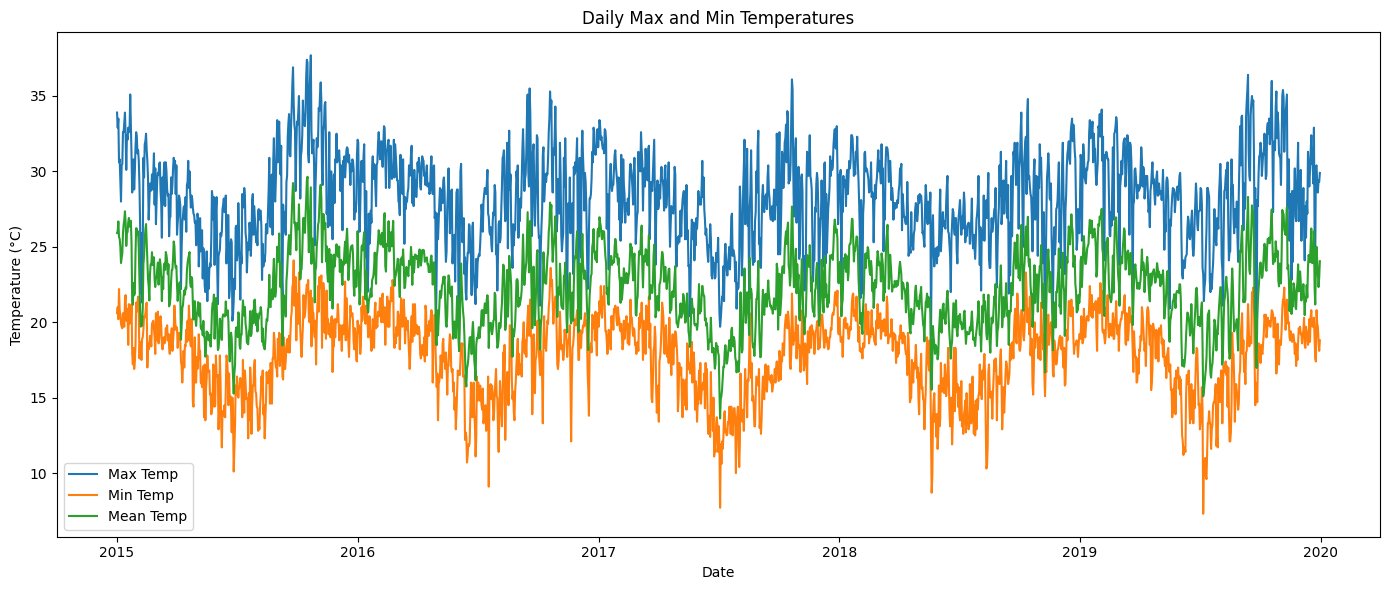

In [12]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_summary, x='Data', y='Temp. Max. (C)', label='Max Temp')
sns.lineplot(data=daily_summary, x='Data', y='Temp. Min. (C)', label='Min Temp')
sns.lineplot(data=daily_summary, x='Data', y='Temp. Ins. (C)', label='Mean Temp')

plt.title('Daily Max and Min Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
daily_summary.rename(columns={
    'Data': 'Date',
    'Temp. Max. (C)': 'temp_max',
    'Temp. Min. (C)': 'temp_min',
    'Temp. Ins. (C)': 'temp_mean',
    'Umi. Max. (%)': 'humidity_max',
    'Umi. Min. (%)': 'humidity_min'
}, inplace=True)

In [14]:
# Export csv
daily_summary.to_csv('daily_weather_pampulha_2015_19.csv', index=False)